# Problem Set 1
## Members
    - Edmundo Arias – 202110688
    - Lucia Maldonado – 202012558
    - Juan Diego Heredia – 201813809

### Date: September 15th, 2024

# 0. Set Up

In [ ]:
### Start

# clear environment and load libraries
rm(list = ls())
# nolint start

# install and load required packages
packages <- c(
    "tidyverse", "ggplot2", "stargazer",
    "rvest", "dplyr", "httr", "boot", "broom",
    "lmtest", "fixest", "sandwich", "lmtest",
    "parallel", "foreach", "doParallel",
    "future.apply", "caret", "rio", "leaps", "lfe"
)
invisible(lapply(packages, function(pkg) {
    if (!requireNamespace(pkg, quietly = TRUE)) install.packages(pkg)
    library(pkg, character.only = TRUE)
}))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

# 1. Data

In [ ]:
plan(multisession) # Paralellizing

# Define the scraping function
scrape_page <- function(url) {
  response <- GET(url)
  if (status_code(response) != 200) {
    warning(paste("Failed to retrieve page:", url))
    return(NULL)
  }
  content <- content(response, "text")
  page <- read_html(content)
  include_element <- html_node(page, "[w3-include-html]")
  include_url <- html_attr(include_element, "w3-include-html")
  full_include_url <- paste0("https://ignaciomsarmiento.github.io/GEIH2018_sample/", include_url)
  included_content <- read_html(full_include_url)
  df_page <- html_node(included_content, "table") %>% html_table()
  return(df_page)
}

In [ ]:
base_url <- "https://ignaciomsarmiento.github.io/GEIH2018_sample/page"

# Use future_lapply to run tasks asynchronously -> gracias Ignacio :)
df_list <- future_lapply(1:10, function(i) {
  url <- paste0(base_url, i, ".html")
  df_page <- scrape_page(url)
  if (!is.null(df_page)) print(paste("Successfully scraped page", i))  # Print status if successful
  return(df_page)
})
df_list <- Filter(Negate(is.null), df_list)

# combine
df <- do.call(rbind, df_list)

[1] "Successfully scraped page 1"
[1] "Successfully scraped page 2"
[1] "Successfully scraped page 3"
[1] "Successfully scraped page 4"
[1] "Successfully scraped page 5"
[1] "Successfully scraped page 6"
[1] "Successfully scraped page 7"
[1] "Successfully scraped page 8"
[1] "Successfully scraped page 9"
[1] "Successfully scraped page 10"


In [ ]:
df

X,directorio,secuencia_p,orden,clase,dominio,mes,estrato1,sex,age,⋯,y_accidentes_m,y_salarySec_m,y_ingLab_m_ha,y_gananciaNeta_m,y_gananciaNetaAgro_m,y_gananciaIndep_m,y_gananciaIndep_m_hu,y_total_m,y_total_m_ha,log_wage
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,4514331,1,1,1,BOGOTA,1,2,1,36,⋯,NA,NA,8404.320,NA,NA,NA,NA,1620833.2,8404.320,14.29845
9,4514333,1,1,1,BOGOTA,1,2,1,51,⋯,NA,NA,6703.343,NA,NA,NA,NA,1378973.4,6703.343,14.13685
14,4514334,1,1,1,BOGOTA,1,2,1,45,⋯,NA,NA,3680.654,NA,NA,NA,NA,883357.0,3680.654,13.69149
16,4514335,1,1,1,BOGOTA,1,2,1,61,⋯,NA,NA,4083.333,NA,NA,NA,NA,700000.0,4083.333,13.45884
22,4514338,1,2,1,BOGOTA,1,2,0,35,⋯,NA,NA,9437.848,NA,NA,NA,NA,1941500.1,9437.848,14.47897
23,4514339,1,1,1,BOGOTA,1,2,0,35,⋯,NA,NA,6317.500,NA,NA,NA,NA,1083000.0,6317.500,13.89525
26,4514339,1,2,1,BOGOTA,1,2,1,39,⋯,NA,NA,8571.465,NA,NA,NA,NA,1616333.4,8571.465,14.29567
34,4514343,1,1,1,BOGOTA,1,2,1,29,⋯,NA,NA,3366.049,NA,NA,NA,NA,779000.0,3366.049,13.56577
49,4514348,1,1,1,BOGOTA,1,2,0,56,⋯,NA,NA,3990.277,NA,NA,NA,NA,820857.0,3990.277,13.61811


In [342]:
##Export the final dataset, so we don't have to run it each time.
## If you are replicating this code, please ignore this cell. ##

install.packages("googledrive")
library(googledrive)
drive_auth()
drive_ls()

getwd()



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: mariafernandalucia@gmail.com


Selection: 2


Auto-refreshing stale OAuth token.

ERROR while rich displaying an object: Error in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L): number of columns of matrices must match (see arg 3)

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }

[1] "/content"

In [ ]:
save(df, file = "/content/GEIH.RData")


In [ ]:
list.files()


[1] "GEIH.RData"  "sample_data"

# 2. Descriptive Stats (Lucía)

In [442]:
# Import the dataset (alternatively, you can run this code from scratch)
library(rio)
geih <- import("https://github.com/EAriasDeAbreu/BigDataML-Group2024/raw/main/Problem_Set_1/data/GEIH.RData")

##2.1. Numerical Vars

In [405]:
# prep data
geih <- geih[geih$age > 18 & geih$ocu == 1, ]
names(geih) <- make.names(names(geih), unique = TRUE) # set df names

# drop missing wages; log transform
geih <- geih %>%
    filter(!is.na(y_ingLab_m_ha), !is.na(age)) %>%
    mutate(log_wage = log(y_ingLab_m_ha))

#Currently sex = 1 if Male, we need to invert this variable
geih$sex <- ifelse(geih$sex == 0, 1, 0)

#Income in Millions
geih$ingtotob <- geih$ingtotob / 1000000


##Education
geih <- geih %>%
  filter(!(p6210s1 %in% c(99, 98)))

In [414]:
# Load necessary libraries
library(dplyr)

# Create an empty matrix (3 rows, 11 columns) for the results
table1 <- matrix(NA, nrow = 5, ncol = 10)

males <- geih %>%
  filter(sex == 0)

females <- geih %>%
  filter(sex == 1)

##AGE - Males

summary_stats_1 <- males %>%
  summarise(N = n(),
            mean = mean(age, na.rm = TRUE),
            sd = sd(age, na.rm = TRUE),
            p50 = median(age, na.rm = TRUE))

# Store the summary statistics in the table
table1[1, 1] <- summary_stats_1$N
table1[1, 2] <- summary_stats_1$mean
table1[1, 3] <- summary_stats_1$sd
table1[1, 4] <- summary_stats_1$p50

##AGE - Females

summary_stats_2 <- females %>%
  summarise(N = n(),
            mean = mean(age, na.rm = TRUE),
            sd = sd(age, na.rm = TRUE),
            p50 = median(age, na.rm = TRUE))

# Store the summary statistics in the table
table1[1, 6] <- summary_stats_2$N
table1[1, 7] <- summary_stats_2$mean
table1[1, 8] <- summary_stats_2$sd
table1[1, 9] <- summary_stats_2$p50

# Perform t-test for gender
t_test_1 <- t.test(age ~ sex, data = geih)

# Store the p-value in the table
table1[1, 10] <- t_test_1$p.value


## Hourly Wage - Males

summary_stats_1 <- males %>%
  summarise(N = n(),
            mean = mean(y_ingLab_m_ha, na.rm = TRUE),
            sd = sd(y_ingLab_m_ha, na.rm = TRUE),
            p50 = median(y_ingLab_m_ha, na.rm = TRUE))

# Store the summary statistics in the table
table1[2, 1] <- summary_stats_1$N
table1[2, 2] <- summary_stats_1$mean
table1[2, 3] <- summary_stats_1$sd
table1[2, 4] <- summary_stats_1$p50

## Hourly Wage - Females

summary_stats_2 <- females %>%
  summarise(N = n(),
            mean = mean(y_ingLab_m_ha, na.rm = TRUE),
            sd = sd(y_ingLab_m_ha, na.rm = TRUE),
            p50 = median(y_ingLab_m_ha, na.rm = TRUE))

# Store the summary statistics in the table
table1[2, 6] <- summary_stats_2$N
table1[2, 7] <- summary_stats_2$mean
table1[2, 8] <- summary_stats_2$sd
table1[2, 9] <- summary_stats_2$p50

# Perform t-test for gender
t_test_1 <- t.test(y_ingLab_m_ha ~ sex, data = geih)

# Store the p-value in the table
table1[2, 10] <- t_test_1$p.value


## hoursWorkUsual - Males

summary_stats_1 <- males %>%
  summarise(N = n(),
            mean = mean(hoursWorkUsual, na.rm = TRUE),
            sd = sd(hoursWorkUsual, na.rm = TRUE),
            p50 = median(hoursWorkUsual, na.rm = TRUE))

# Store the summary statistics in the table
table1[3, 1] <- summary_stats_1$N
table1[3, 2] <- summary_stats_1$mean
table1[3, 3] <- summary_stats_1$sd
table1[3, 4] <- summary_stats_1$p50

## hoursWorkUsual - Females

summary_stats_2 <- females %>%
  summarise(N = n(),
            mean = mean(hoursWorkUsual, na.rm = TRUE),
            sd = sd(hoursWorkUsual, na.rm = TRUE),
            p50 = median(hoursWorkUsual, na.rm = TRUE))

# Store the summary statistics in the table
table1[3, 6] <- summary_stats_2$N
table1[3, 7] <- summary_stats_2$mean
table1[3, 8] <- summary_stats_2$sd
table1[3, 9] <- summary_stats_2$p50

# Perform t-test for gender
t_test_1 <- t.test(hoursWorkUsual ~ sex, data = geih)

# Store the p-value in the table
table1[3, 10] <- t_test_1$p.value


## ingtotob - Males

summary_stats_1 <- males %>%
  summarise(N = n(),
            mean = mean(ingtotob, na.rm = TRUE),
            sd = sd(ingtotob, na.rm = TRUE),
            p50 = median(ingtotob, na.rm = TRUE))

# Store the summary statistics in the table
table1[4, 1] <- summary_stats_1$N
table1[4, 2] <- summary_stats_1$mean
table1[4, 3] <- summary_stats_1$sd
table1[4, 4] <- summary_stats_1$p50

## ingtotob - Females

summary_stats_2 <- females %>%
  summarise(N = n(),
            mean = mean(ingtotob, na.rm = TRUE),
            sd = sd(ingtotob, na.rm = TRUE),
            p50 = median(ingtotob, na.rm = TRUE))

# Store the summary statistics in the table
table1[4, 6] <- summary_stats_2$N
table1[4, 7] <- summary_stats_2$mean
table1[4, 8] <- summary_stats_2$sd
table1[4, 9] <- summary_stats_2$p50

# Perform t-test for gender
t_test_1 <- t.test(ingtotob ~ sex, data = geih)

# Store the p-value in the table
table1[4, 10] <- t_test_1$p.value

## p6210s1 - Males

summary_stats_1 <- males %>%
  summarise(N = n(),
            mean = mean(p6210s1, na.rm = TRUE),
            sd = sd(p6210s1, na.rm = TRUE),
            p50 = median(p6210s1, na.rm = TRUE))

# Store the summary statistics in the table
table1[5, 1] <- summary_stats_1$N
table1[5, 2] <- summary_stats_1$mean
table1[5, 3] <- summary_stats_1$sd
table1[5, 4] <- summary_stats_1$p50

## p6210s1 - Females

summary_stats_2 <- females %>%
  summarise(N = n(),
            mean = mean(p6210s1, na.rm = TRUE),
            sd = sd(p6210s1, na.rm = TRUE),
            p50 = median(p6210s1, na.rm = TRUE))

# Store the summary statistics in the table
table1[5, 6] <- summary_stats_2$N
table1[5, 7] <- summary_stats_2$mean
table1[5, 8] <- summary_stats_2$sd
table1[5, 9] <- summary_stats_2$p50

# Perform t-test for gender
t_test_1 <- t.test(ingtotob ~ sex, data = geih)

# Store the p-value in the table
table1[5, 10] <- t_test_1$p.value


#Rownames
rownames(table1) <- c('Edad', 'Salario por Hora ($COP)', 'Horas trabajadas por Semana',
                      'Ingreso Total Observado (Millones $COP)', 'Años de Educación')

colnames(table1) <- c("Número", "Media", "Est. Des.", "P50", "",
                      "Número", "Media", "Est. Des.", "P50", "P-valor")


table1_formatted <- table1
table1_formatted[, 1] <- format(table1[, 1], nsmall = 0)
table1_formatted[, 6] <- format(table1[, 6], nsmall = 0)

# View the table
table1


,Número,Media,Est. Des.,P50,,Número,Media,Est. Des.,P50,P-valor
Edad,4909,36.133836,12.048049,34.000000,NA,4875,36.745026,11.818419,35.000000,1.132406e-02
Salario por Hora ($COP),4909,9043.918820,13398.114987,5266.204102,NA,4875,8692.289425,12413.994714,4882.998047,1.781198e-01
Horas trabajadas por Semana,4909,50.271135,12.153679,48.000000,NA,4875,45.876513,11.559108,48.000000,8.604296e-74
Ingreso Total Observado (Millones $COP),4909,1.948116,2.667885,1.189878,NA,4875,1.774154,2.302917,1.065557,5.562858e-04
Años de Educación,4909,7.075575,3.509765,7.000000,NA,4875,6.647795,3.527262,6.000000,5.562858e-04


In [409]:
t_test_1 <- t.test(y_ingLab_m_ha ~ sex, data = geih)
t_test_1
model_gap <- lm(y_ingLab_m_ha ~ sex, data = geih)
stargazer(model_gap)


	Welch Two Sample t-test

data:  y_ingLab_m_ha by sex
t = 1.3428, df = 9736.7, p-value = 0.1794
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -161.1876  862.3739
sample estimates:
mean in group 0 mean in group 1 
       9042.883        8692.289 



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sat, Sep 14, 2024 - 10:59:09 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & y\_ingLab\_m\_ha \\ 
\hline \\[-1.8ex] 
 sex & $-$350.593 \\ 
  & (261.156) \\ 
  & \\ 
 Constant & 9,042.883$^{***}$ \\ 
  & (184.335) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 9,785 \\ 
R$^{2}$ & 0.0002 \\ 
Adjusted R$^{2}$ & 0.0001 \\ 
Residual Std. Error & 12,916.580 (df = 9783) \\ 
F Statistic & 1.802 (df = 1; 9783) \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table} 


In [392]:
#Export it
latex_table <- xtable(table1, caption = "Resumen de Estadísticas")

file_path <- "/content/Punto_2_1.tex"
sink(file_path)
print(latex_table, type = "latex", include.rownames = TRUE, include.colnames = TRUE,
      digits = c(0, rep(2, 5), 0, rep(2, 4)))  # Set 0 decimals for columns 1 and 6
sink()

% latex table generated in R 4.4.1 by xtable 1.8-4 package
% Sat Sep 14 22:55:16 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrrrrrrr}
  \hline
 & Número & Media & Est. Des. & P50 & V5 & Número & Media & Est. Des. & P50 & P-valor \\ 
  \hline
Edad & 4910.00 & 36.13 & 12.05 & 34.00 &  & 4875.00 & 36.75 & 11.82 & 35.00 & 0.01 \\ 
  Salario por Hora (\$COP) & 4910.00 & 9042.88 & 13396.95 & 5266.20 &  & 4875.00 & 8692.29 & 12413.99 & 4883.00 & 0.18 \\ 
  Horas trabajadas por Semana & 4910.00 & 50.27 & 12.15 & 48.00 &  & 4875.00 & 45.88 & 11.56 & 48.00 & 0.00 \\ 
  Ingreso Total Observado (Millones \$COP) & 4910.00 & 1.95 & 2.67 & 1.19 &  & 4875.00 & 1.77 & 2.30 & 1.07 & 0.00 \\ 
  Años de Educación & 4910.00 & 7.09 & 3.75 & 7.00 &  & 4875.00 & 6.65 & 3.53 & 6.00 & 0.00 \\ 
   \hline
\end{tabular}
\caption{Resumen de Estadísticas} 
\end{table}


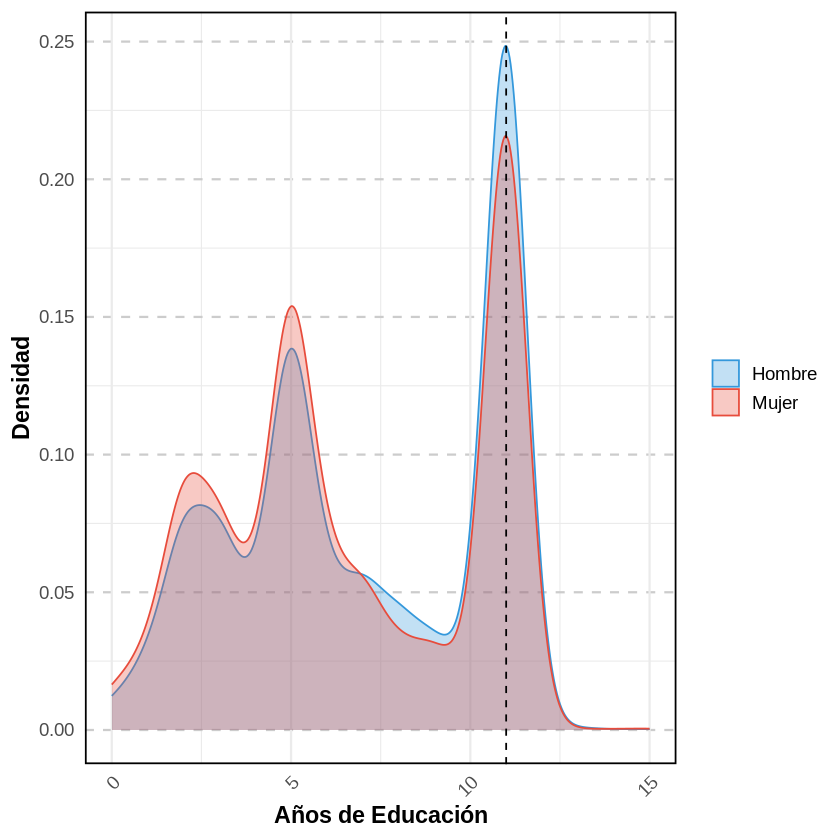

In [432]:
##Hist Schooling
combined_data <- bind_rows(
  males %>% mutate(gender = "Hombre", p6210s1 = as.numeric(p6210s1)),
  females %>% mutate(gender = "Mujer", p6210s1 = as.numeric(p6210s1))
)

# Crear el gráfico de densidad kernel con línea vertical en x = 11
plot_sch <- ggplot(combined_data, aes(x = p6210s1, color = gender, fill = gender)) +
  geom_density(alpha = 0.3) +
  geom_vline(xintercept = 11, linetype = "dashed", color = "black") +
  labs(x = "Años de Educación", y = "Densidad") +
  scale_color_manual(values = c("Hombre" = "#3498db", "Mujer" = "#e74c3c")) +
  scale_fill_manual(values = c("Hombre" = "#3498db", "Mujer" = "#e74c3c")) +
  theme_minimal(base_size = 14) +
  theme(legend.title = element_blank(),
  panel.border = element_rect(color = "black", fill = NA, size = 1),
  axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(face = "bold", size = 14),
        plot.title = element_text(face = "bold", size = 16),
        panel.grid.major.y = element_line(color = "grey80", linetype = "dashed"))

plot_sch

In [433]:
ggsave("/content/Punto_2_6.pdf", plot = plot_sch, width = 10, height = 7, units = "in")

## 2.2 Categorical Vars

### 2.2.1 Oficio

In [437]:
# Load necessary libraries
library(dplyr)
library(knitr)

category_descriptions <- tibble(
  oficio = c(39, 45, 58, 54, 53, 33, 21, 55, 13, 3),
  description = c("Personal Administrativo",
                   "Vendedores",
                   "Seguridad pública",
                   "Empleados domésticos",
                   "Servicios de Alimento",
                   "Cajeros",
                   "Personal Directivo",
                   "Seguridad Privada",
                   "Docentes",
                   "Técnicos Especializados")
)

oficio_summary <- geih %>%
  count(oficio) %>%  # Count occurrences of each category
  mutate(share = n / sum(n) * 100) %>%  # Calculate share as percentage
  arrange(desc(share)) %>%  # Arrange in descending order by share
  slice_head(n = 10) %>%  # Select the top 10 categories with the highest share
  left_join(category_descriptions, by = "oficio") %>%  # Join with descriptions
  select(description, oficio, n, share)  # Reorder columns to place description first

# Print the summary table
kable(oficio_summary, col.names = c("Nombre", "Código DANE", "Número", "Porcentaje (%)"),
      caption = "Top 10 Categorías de Oficio por Porcentaje")




Table: Top 10 Categorías de Oficio por Porcentaje

|Nombre                  | Código DANE| Número| Porcentaje (%)|
|:-----------------------|-----------:|------:|--------------:|
|Seguridad pública       |          58|    517|      10.531676|
|NA                      |          95|    356|       7.251986|
|Personal Administrativo |          39|    337|       6.864942|
|NA                      |          98|    332|       6.763088|
|Vendedores              |          45|    325|       6.620493|
|NA                      |          97|    260|       5.296394|
|Técnicos Especializados |           3|    258|       5.255653|
|Personal Directivo      |          21|    202|       4.114891|
|Servicios de Alimento   |          53|    164|       3.340803|
|NA                      |           2|    139|       2.831534|

In [322]:
#Export it
# Generate LaTeX table
kable(oficio_summary, col.names = c("Nombre", "Código DANE", "Número", "Porcentaje (%)"),
      caption = "Top 10 Categorías de Oficio por Porcentaje",
      format = "latex") %>%
  cat(file = "Punto_2_2.tex")


### 2.2.2. Size Firm

In [440]:

size_firm_descriptions <- tibble(
  sizeFirm = c(1, 2, 3, 4, 5),
  description = c("Cuenta Propia",
                   "2 - 5 Trabajadores",
                   "6 - 10 Trabajadores",
                   "11 - 50 Trabajadores",
                   ">50 Trabajadores")
)


size_firm_summary <- geih %>%
  count(sizeFirm) %>%
  mutate(share = n / sum(n) * 100) %>%
  arrange(desc(share)) %>%
  left_join(size_firm_descriptions, by = "sizeFirm") %>%
  select(description, sizeFirm, n, share)

# Print
kable(size_firm_summary, col.names = c("Nombre", "Código DANE", "Número", "Porcentaje (%)"),
      caption = "Tamaño de Empresa")




Table: Tamaño de Empresa

|Nombre               | Código DANE| Número| Porcentaje (%)|
|:--------------------|-----------:|------:|--------------:|
|>50 Trabajadores     |           5|   5072|      51.834440|
|11 - 50 Trabajadores |           4|   1676|      17.128258|
|2 - 5 Trabajadores   |           2|   1665|      17.015841|
|6 - 10 Trabajadores  |           3|    834|       8.523250|
|Cuenta Propia        |           1|    538|       5.498212|

In [346]:
#Export it
# Generate LaTeX table
kable(size_firm_summary, col.names = c("Nombre", "Código DANE", "Número", "Porcentaje (%)"),
      caption = "Tamaño de Empresa",
      format = "latex") %>%
  cat(file = "/content/Punto_2_3.tex")

### 2.2.3. Employment Relationship

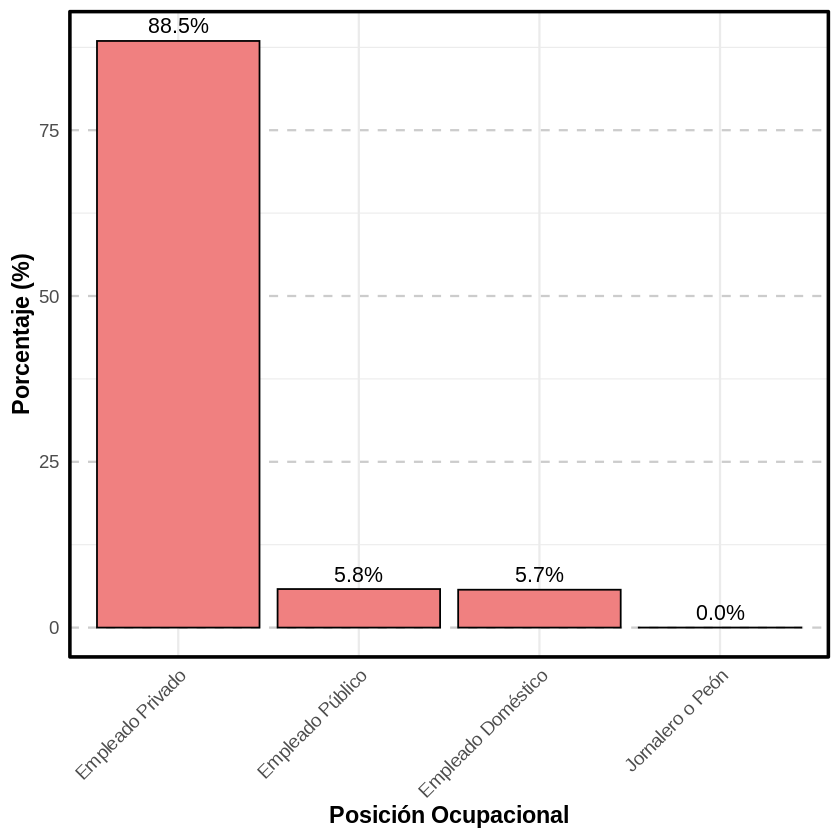

In [443]:
relab_summary <- geih %>%
  count(relab) %>%
  mutate(share = n / sum(n) * 100) %>%
  arrange(desc(share))

plot2 <- ggplot(relab_summary, aes(x = reorder(as.factor(relab), -share), y = share)) +
  geom_bar(stat = "identity", fill = "lightcoral", color = "black") +
  geom_text(aes(label = sprintf("%.1f%%", share)),
            vjust = -0.5, color = "black", size = 4.5) +
  scale_x_discrete(labels = c("1" = "Empleado Privado",
                              "2" = "Empleado Público",
                              "3" = "Empleado Doméstico",
                              "8" = "Jornalero o Peón")) +
  labs(x = "Posición Ocupacional", y = "Porcentaje (%)") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(face = "bold", size = 14),
        plot.title = element_text(face = "bold", size = 16),
        panel.grid.major.y = element_line(color = "grey80", linetype = "dashed"),
        panel.border = element_rect(color = "black", fill = NA, size = 1)) +
  coord_cartesian(clip = 'off')
plot2

In [369]:
ggsave("/content/Punto_2_4.pdf", plot = plot2, width = 10, height = 7, units = "in")

### 2.2.4. Pension

In [371]:
freq_table <- table(geih$cotPension)

# Create a data frame with frequencies and percentages
result <- data.frame(
  Category = names(freq_table),
  Frequency = as.vector(freq_table),
  Percentage = round(100 * prop.table(freq_table), 2)
)

# Print the table
print(result)

  Category Frequency Percentage.Var1 Percentage.Freq
1        1      7484               1           76.48
2        2      2194               2           22.42
3        3       107               3            1.09


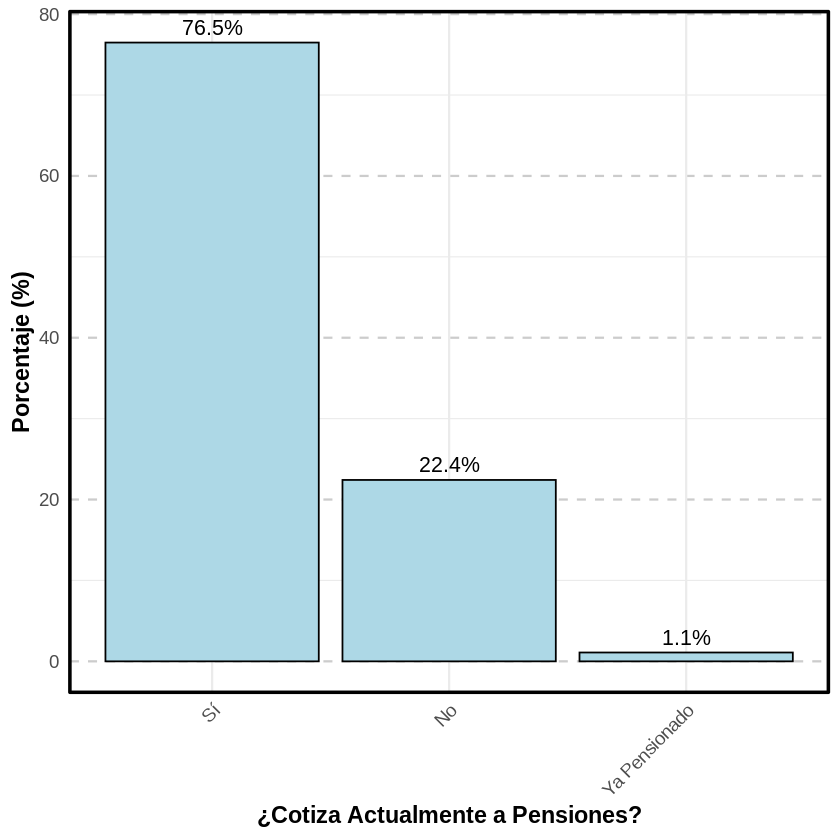

In [382]:
relab_summary <- geih %>%
  count(cotPension) %>%
  mutate(share = n / sum(n) * 100) %>%
  arrange(desc(share))

plot3 <- ggplot(relab_summary, aes(x = reorder(as.factor(cotPension), -share), y = share)) +
  geom_bar(stat = "identity", fill = "lightblue", color = "black") +
  geom_text(aes(label = sprintf("%.1f%%", share)),
            vjust = -0.5, color = "black", size = 4.5) +
  scale_x_discrete(labels = c("1" = "Sí",
                              "2" = "No",
                              "3" = "Ya Pensionado")) +
  labs(x = "¿Cotiza Actualmente a Pensiones?", y = "Porcentaje (%)") +
  theme_minimal(base_size = 14) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(face = "bold", size = 14),
        plot.title = element_text(face = "bold", size = 16),
        panel.grid.major.y = element_line(color = "grey80", linetype = "dashed"),
        panel.border = element_rect(color = "black", fill = NA, size = 1)) +
  coord_cartesian(clip = 'off')
plot3

In [384]:
ggsave("/content/Punto_2_5.pdf", plot = plot3, width = 10, height = 7, units = "in")

# 3. Gender Earnings GAP (Lucía)

## 3.1. Unconditional GAP

In [447]:
# Import the dataset (alternatively, you can run this code from scratch)
library(rio)
geih <- import("https://github.com/EAriasDeAbreu/BigDataML-Group2024/raw/main/Problem_Set_1/data/GEIH.RData")


In [448]:
# Wage per hour
summary(geih$y_ingLab_m_ha)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   326.7   4226.5   5071.8   8868.2   8101.9 350583.3 

In [449]:
# prep data
geih <- geih[geih$age > 18 & geih$ocu == 1, ]
names(geih) <- make.names(names(geih), unique = TRUE) # set df names

# drop missing wages; log transform
geih <- geih %>%
    filter(!is.na(y_ingLab_m_ha), !is.na(age)) %>%
    mutate(log_wage = log(y_ingLab_m_ha))

#Currently sex = 1 if Male, we need to invert this variable
geih$sex <- ifelse(geih$sex == 0, 1, 0)

#Income in Millions
geih$ingtotob <- geih$ingtotob / 1000000


##Education
geih <- geih %>%
  filter(!(p6210s1 %in% c(99, 98)))

In [450]:
#Run the model
model_gap <- lm(log_wage ~ sex, data = geih)
robust_se <- vcovHC(model_gap, type = "HC1") # heteroskedasticity robust SE
robust_summary <- coeftest(model_gap, vcov = robust_se)
print(robust_summary)


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept)  8.754597   0.010123 864.8138 < 2.2e-16 ***
sex         -0.047558   0.014681  -3.2394  0.001202 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [451]:
#Export it (You need to have an Drive account Liked to save this)
stargazer(model_gap, type = "latex",
          covariate.labels = c("$Female$", "$\\beta_0$"),
          out = "/content/Punto_4_1.tex")



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sun, Sep 15, 2024 - 12:10:35 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & log\_wage \\ 
\hline \\[-1.8ex] 
 $Female$ & $-$0.048$^{***}$ \\ 
  & (0.015) \\ 
  & \\ 
 $\beta_0$ & 8.755$^{***}$ \\ 
  & (0.010) \\ 
  & \\ 
\hline \\[-1.8ex] 
Observations & 9,784 \\ 
R$^{2}$ & 0.001 \\ 
Adjusted R$^{2}$ & 0.001 \\ 
Residual Std. Error & 0.726 (df = 9782) \\ 
F Statistic & 10.497$^{***}$ (df = 1; 9782) \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\ 
\end{tabular} 
\end{table} 


## 3.2. Conditional GAP

###3.2.1.a. What controls to use?

####3.2.1.a.1. Eyeballing

In [453]:
library(lfe)
# define control variables
geih$age_squared <- geih$age^2
geih$sizeFirm <- as.character(geih$sizeFirm)
geih$cotPension <- as.character(geih$cotPension)


controls <- c("age", "p6210s1", "hoursWorkUsual", "sizeFirm", "cotPension", "age_squared")

## --> "p6220s1" refers to education attainment

# i) FWL: Standard SE's
formula_controls <- as.formula(paste(
    "log_wage ~",
    paste(controls, collapse = " + "), "| depto + relab + oficio"
))
formula_controls_sex <- as.formula(paste(
    "sex ~",
    paste(controls, collapse = " + "), "| depto + depto + relab + oficio"
))

# partial out  controls
residuals_y <- feols(formula_controls, data = geih)$residuals
residuals_sex <- feols(formula_controls_sex, data = geih)$residuals

# regress residuals
fwl_model <- lm(residuals_y ~ residuals_sex)

robust_se_fwl <- vcovHC(fwl_model, type = "HC1") # heteroskedasticity robust SE
robust_summary_fwl <- coeftest(fwl_model, vcov = robust_se)

# stats
fwl_coef <- coef(fwl_model)[2]
fwl_se <- sqrt(vcov(fwl_model)[2, 2])

In [255]:
#Let us ensure that we followed the procedure correctly by focusing on the coefficients for gender.


no_fwl_model <- felm(log_wage ~ sex + age  + p6210  + hoursWorkUsual + sizeFirm + cotPension + age_squared | oficio + relab, data = geih)
print(no_fwl_model)

           sex            age          p6210 hoursWorkUsual       sizeFirm 
    -0.1039389      0.0324755      0.1169793     -0.0104134      0.1053534 
    cotPension    age_squared 
    -0.1809787     -0.0002729 


3.2.1.a.1.1. Bootstrap



In [454]:
# remember our old f?
boot_fwl <- function(data, indices) {
    resid_y <- residuals_y[indices]
    resid_sex <- residuals_sex[indices]
    boot_model <- lm(resid_y ~ resid_sex)
    return(coef(boot_model)[2])
}

# bootstrap
set.seed(555)
boot_results <- boot(data = geih, statistic = boot_fwl, R = 10000)

# bootstrap standard error

boot_se <- sd(boot_results$t)

In [455]:
print(boot_se)

[1] 0.01270855


3.2.1.a.1.2. Results

In [467]:
##Export results:

sex_only_model <- fwl_coef
sex_only_se <- boot_se # calculated bootstrap

#coefficients
sex_model_custom <- list()
sex_model_custom$coefficients <- sex_only_model
sex_model_custom$se <- sex_only_se


custom_model <- lm(log_wage ~ 0 + sex, data = geih) # format
coef_custom <- coef(custom_model)
coef_custom["sex"] <- sex_only_model
se_custom <- rep(NA, length(coef_custom)) # empty errors for all, but sex
se_custom["sex"] <- sex_only_se
stargazer(model_gap, no_fwl_model, custom_model,
          coef = list(coef(model_gap), coef(no_fwl_model), coef_custom),
          se = list(summary(model_gap)$coefficients[, "Std. Error"], summary(no_fwl_model)$coefficients[, "Std. Error"], se_custom),
          type = "text",
          column.labels = c("Incondicional", "Condicional", "Condicional"),
          covariate.labels = c("Sexo", "Edad", "Oficio", "P6210", "Relación Laboral", "Horas Usuales"),
          omit.stat = c("f", "ser", "adj.rsq"),
          add.lines = list(
            c("Bootstrap", "No", "No", "Sí"),
            c("Covariables", "Sí", "Sí", "No")
          ),
          no.space = TRUE)


                          Dependent variable:         
                 -------------------------------------
                               log_wage               
                      OLS         felm         OLS    
                 Incondicional Condicional Condicional
                      (1)          (2)         (3)    
------------------------------------------------------
Sexo               -0.048***    -0.104***   -0.097*** 
                    (0.015)      (0.012)     (0.013)  
Edad                            0.032***              
                                 (0.003)              
Oficio                          0.117***              
                                 (0.007)              
P6210                           -0.010***             
                                (0.0004)              
Relación Laboral                0.105***              
                                 (0.005)              
Horas Usuales                   -0.181***             
         

In [457]:
stargazer(model_gap, no_fwl_model, custom_model,
          coef = list(coef(model_gap), coef(no_fwl_model), coef_custom),
          se = list(summary(model_gap)$coefficients[, "Std. Error"], summary(no_fwl_model)$coefficients[, "Std. Error"], se_custom),
          type = "latex",
          column.labels = c("Incondicional", "Condicional", "Condicional"),
          covariate.labels = c("Sexo", "Edad", "Oficio", "P6210", "Relación Laboral", "Horas Usuales"),
          omit.stat = c("f", "ser", "adj.rsq"),
          add.lines = list(
            c("Bootstrap", "No", "No", "Sí"),
            c("Covariables", "Sí", "Sí", "No")
          ),
          no.space = TRUE,
          out = "/content/Punto_4_1.tex")


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sun, Sep 15, 2024 - 12:12:22 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & \multicolumn{3}{c}{log\_wage} \\ 
\\[-1.8ex] & \textit{OLS} & \textit{felm} & \textit{OLS} \\ 
 & Incondicional & Condicional & Condicional \\ 
\\[-1.8ex] & (1) & (2) & (3)\\ 
\hline \\[-1.8ex] 
 Sexo & $-$0.048$^{***}$ & $-$0.104$^{***}$ & $-$0.097$^{***}$ \\ 
  & (0.015) & (0.012) & (0.013) \\ 
  Edad &  & 0.032$^{***}$ &  \\ 
  &  & (0.003) &  \\ 
  Oficio &  & 0.117$^{***}$ &  \\ 
  &  & (0.007) &  \\ 
  P6210 &  & $-$0.010$^{***}$ &  \\ 
  &  & (0.0004) &  \\ 
  Relación Laboral &  & 0.105$^{***}$ &  \\ 
  &  & (0.005) &  \\ 
  Horas Usuales &  & $-$0.181$^{***}$ &  \\ 
  &  & (0.014) &  \\ 
  age\_squar

### 5.0 Plot


#### 5.1 Prediction

In [458]:
summary(geih$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   27.00   34.00   36.44   45.00   86.00 

In [459]:
table(geih$oficio)


  1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19  20  21 
 12 197 365   2  17  55  51 123  41 169 103 375   4  31  62  14  20 129   1 419 
 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  49  50  51  52 
104   9 107 424  44  10  37 132 203 805  38  24  48  13 161 769   2  30  23   5 
 53  54  55  56  57  58  59  61  62  63  70  72  73  74  75  76  77  78  79  80 
549 566 409  21  20 607 253   1  32   2  56   6   2  10  12   2 137   1 182  48 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 
 44   1  67  99  98   3  95   1  19  52  10  30  50  11 359   2 356 334  59 

In [462]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Create factor levels for fixed effects
geih_plot <- geih %>%
  mutate(oficio = as.factor(oficio),
         relab = as.factor(relab))

geih_plot$age_squared <- geih_plot$age^2

# Fit the model with fixed effects using lm
model <- lm(log_wage ~ sex + age + p6210 + hoursWorkUsual + sizeFirm + cotPension + age_squared +
             factor(oficio) + factor(relab), data = geih_plot)


age_seq <- seq(from = 19, to = 86, by = 1)
new_data <- data.frame(
  age = age_seq,
  age_squared = age_seq^2,
  sex = c(0,1), # Assuming the mean value for sex
  p6210 = mean(geih$p6210, na.rm = TRUE), # Assuming the mean value for p6210
  hoursWorkUsual = mean(geih$hoursWorkUsual, na.rm = TRUE), # Assuming the mean value for hoursWorkUsual
  sizeFirm = "1", # Assuming the mean value for sizeFirm
  cotPension = "1", # Assuming the mean value for cotPension
  oficio = 9,
  relab = 2
)

# Predict log_wage for the new data and get confidence intervals
predictions <- predict(model, newdata = new_data, interval = "confidence")

# Bind predictions to new_data
new_data <- bind_cols(new_data, as.data.frame(predictions))

#Peak Age
max_fit_sex_0 <- new_data$age[new_data$sex == 0][which.max(new_data$fit[new_data$sex == 0])]
max_fit_sex_1 <- new_data$age[new_data$sex == 1][which.max(new_data$fit[new_data$sex == 0])]


In [468]:
print(max_fit_sex_0)

[1] 53


#### 5.2 Plot

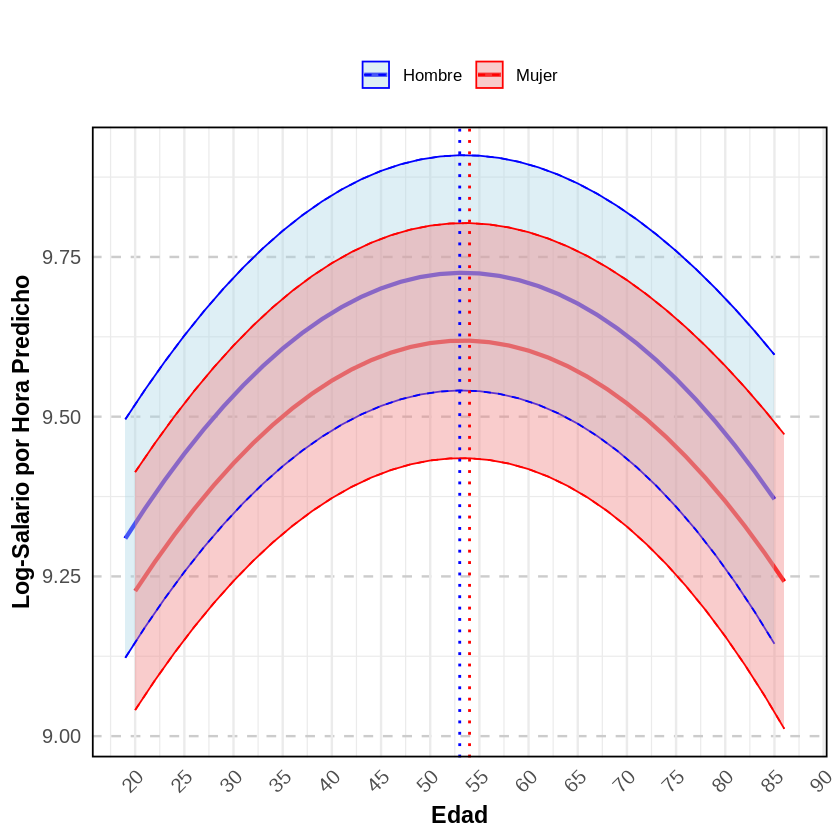

In [470]:
plot <- ggplot(new_data, aes(x = age, y = fit, color = factor(sex))) +
  geom_line(size = 1.2) + # Thicker lines for better visibility
  geom_ribbon(aes(ymin = lwr, ymax = upr, fill = factor(sex)), alpha = 0.4) + # Increased alpha for clearer confidence intervals
  geom_line(aes(y = lwr, color = factor(sex)), linetype = "dashed") + # Dashed line for lower confidence interval
  geom_line(aes(y = upr, color = factor(sex)), linetype = "dashed") + # Dashed line for upper confidence interval
  geom_vline(xintercept = max_fit_sex_0, linetype = "dotted", color = "blue", size = 0.8) + # Vertical line for max fit when sex = 0
  geom_vline(xintercept = max_fit_sex_1, linetype = "dotted", color = "red", size = 0.8) + # Vertical line for max fit when sex = 1
  scale_x_continuous(breaks = seq(20, 100, by = 5), limits = c(19, 87)) + # Set breaks and limits for x-axis
  scale_color_manual(values = c("blue", "red"), labels = c("Hombre", "Mujer")) + # Custom colors and labels for sex
  scale_fill_manual(values = c("lightblue", "lightcoral"), labels = c("Hombre", "Mujer")) + # Lighter fill colors for better contrast
  labs(x = "Edad", y = "Log-Salario por Hora Predicho", color = "Sex", fill = "Sex") +
  theme_minimal(base_size = 15) + # Increase base font size for better readability
  theme(
    legend.position = "top", # Move legend to the top
    legend.title = element_text(size = 12), # Increase font size of legend title
    legend.text = element_text(size = 10), # Increase font size of legend text
    axis.title = element_text(size = 14), # Increase font size of axis titles
    axis.text = element_text(size = 12) # Increase font size of axis labels
  ) +
  ggtitle("") +
  theme(legend.title = element_blank(),
  panel.border = element_rect(color = "black", fill = NA, size = 1),
  axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_text(face = "bold", size = 14),
        plot.title = element_text(face = "bold", size = 16),
        panel.grid.major.y = element_line(color = "grey80", linetype = "dashed")) # Center and increase font size of plot title

plot

In [471]:
ggsave("/content/Punto_4_2.pdf", plot = plot, width = 10, height = 7, units = "in")